In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Simple Linear Regression

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# X and Y need to be two-dimensional arrays of shape (n_samples, n_features) and (n_sample, n_targets) 

In [6]:
heart_y = df["age"].to_numpy()
heart_y.shape

(303,)

In [7]:
heart_y = heart_y.reshape((-1,1))
heart_y.shape

(303, 1)

In [8]:
heart_X = df['chol'].to_numpy()
heart_X = heart_X.reshape((-1, 1))
heart_X.shape

(303, 1)

In [9]:
type(heart_y)

numpy.ndarray

In [11]:
# See slide on train/test dataset
#Train is generally 80 % of your dataset
#Test is generally 20 % of your dataset

In [12]:
# Split the data into training/testing sets

heart_X_train = heart_X[:242]
heart_X_test = heart_X[242:]

In [13]:
# Split the targets into training/testing sets

heart_y_train = heart_y[:242]
heart_y_test = heart_y[242:]

In [14]:
heart_X_train.shape, heart_y_train.shape

((242, 1), (242, 1))

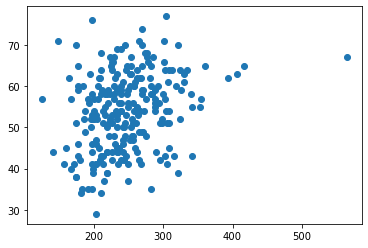

In [17]:
plt.scatter(heart_X_train, heart_y_train)
plt.show()

In [18]:
heart_X_test.shape, heart_X_train.shape

((61, 1), (242, 1))

In [19]:
# Create linear regression object

regr = linear_model.LinearRegression()

In [22]:
??regr.fit

In [23]:
# Train the model using the training sets

regr.fit(heart_X_train, heart_y_train)

LinearRegression()

In [24]:
heart_y_pred = regr.predict(heart_X_train)

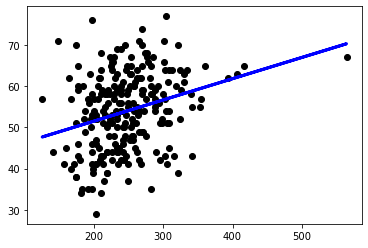

In [25]:
plt.scatter(heart_X_train, heart_y_train,  color='black')
plt.plot(heart_X_train, heart_y_pred, color='blue', linewidth=3)

plt.show()

In [26]:
# Make predictions using the testing set

heart_y_pred = regr.predict(heart_X_test)

In [27]:
# y = ax + b

In [30]:
# The coefficients

print('Coefficients: \n', regr.coef_)

# The intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(heart_y_test, heart_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(heart_y_test, heart_y_pred))

Coefficients: 
 [[0.05169721]]
Intercept: 
 [41.162605]
Mean squared error: 71.51
Coefficient of determination: -0.33


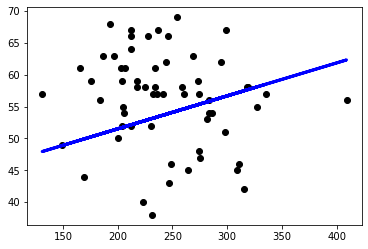

In [29]:
# Plot outputs

plt.scatter(heart_X_test, heart_y_test,  color='black')
plt.plot(heart_X_test, heart_y_pred, color='blue', linewidth=3)

plt.show()


## Polynomial Regression

In [34]:
??regr.fit

In [35]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

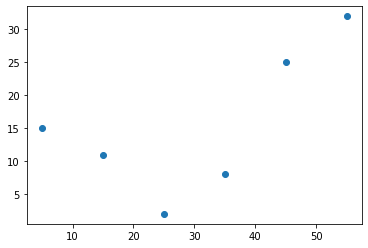

In [36]:
plt.scatter(x, y)
plt.show()

In [37]:
x.shape

(6, 1)

In [51]:
# degree can be greater than 2

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)

In [52]:
# Can replace the above three statements with
# x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [53]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [54]:
model = linear_model.LinearRegression()
model.fit(x_, y)

LinearRegression()

In [55]:
r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


In [57]:
# y = ax^2 + bx + c

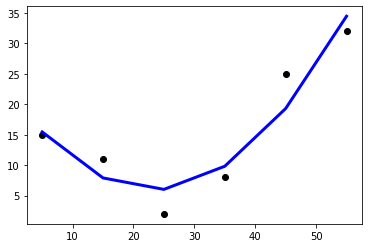

In [56]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()

## Underfitting / Overfitting

In [58]:
# Using linear fit for above example (Under-fitting)

regr.fit(x, y)

y_pred = regr.predict(x)

# The coefficients

print('Coefficients: \n', regr.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

Coefficients: 
 [0.38]
Mean squared error: 61.47
Coefficient of determination: 0.41


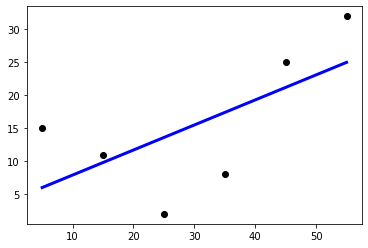

In [59]:
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.show()

coefficient of determination: 1.0
intercept: 15.020359754678793
coefficients: [-2.31761841e-11 -2.47328301e-10 -3.40704264e-09 -3.95084163e-08
 -3.63619813e-07 -2.06682371e-06  2.01144641e-07 -7.26480195e-09
  1.15642163e-10 -6.83323029e-13]


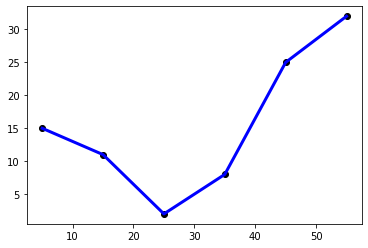

In [60]:
# Over-fitting

x_ = PolynomialFeatures(degree=10, include_bias=False).fit_transform(x)

model = linear_model.LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()


## Train/Test split to avoid under/over fitting

In [76]:
transformer = PolynomialFeatures(degree=5, include_bias=False)

transformer.fit(heart_X_train)

PolynomialFeatures(degree=5, include_bias=False)

In [77]:
heart_X_train_trans = transformer.transform(heart_X_train)

In [78]:
heart_X_test_trans = transformer.transform(heart_X_test)

In [79]:
model = linear_model.LinearRegression().fit(heart_X_train_trans, heart_y_train)

In [80]:
heart_y_pred = model.predict(heart_X_test_trans)

In [81]:
# The coefficients

print('Coefficients: \n', model.coef_)

# The mean squared error

print('Mean squared error of test: %.2f'
      % mean_squared_error(heart_y_test, heart_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination of test: %.2f'
      % r2_score(heart_y_test, heart_y_pred))

Coefficients: 
 [[-6.99138317e+00  4.90413789e-02 -1.63078074e-04  2.59006206e-07
  -1.57136132e-10]]
Mean squared error of test: 74.25
Coefficient of determination of test: -0.38


In [82]:
mse_list_test = list()
mse_list_train = list()

for i in range(1, 15):
    transformer = PolynomialFeatures(degree=i, include_bias=False)
    transformer.fit(heart_X_train)
    heart_X_train_trans = transformer.transform(heart_X_train)
    heart_X_test_trans = transformer.transform(heart_X_test)
    model = linear_model.LinearRegression().fit(heart_X_train_trans, heart_y_train)
    heart_y_pred = model.predict(heart_X_test_trans)
    mse_list_test.append(mean_squared_error(heart_y_test, heart_y_pred))
    heart_y_pred = model.predict(heart_X_train_trans)
    mse_list_train.append(mean_squared_error(heart_y_train, heart_y_pred))

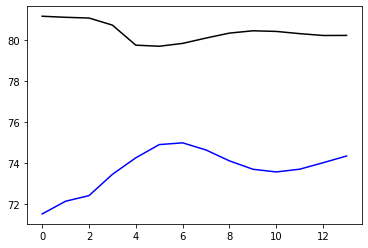

In [86]:
plt.plot(mse_list_test, 'b')
plt.plot(mse_list_train, 'k')
plt.show()

In [87]:
mse_list_test = np.array(mse_list_test)
np.argmin(mse_list_test)+1

1

In [88]:
np.argmin([1,2,3])

0

## That's it folks